In [1]:
import os
import random
from comer.datamodule import vocab
from comer.lit_comer import LitCoMER
from torchvision.transforms import ToTensor
import torch
from PIL import Image, ImageEnhance
from IPython.display import display
import PIL.ImageOps

ckpt = "../lightning_logs/version_0/checkpoints/epoch=151-step=57151-val_ExpRate=0.6365.ckpt"
model = LitCoMER.load_from_checkpoint(ckpt)
model = model.eval()
device = torch.device("cpu")
model = model.to(device)

train_43197.jpg


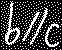

In [3]:
# x = random.choice(os.listdir("/home/jerry/ocr-for-edu/math-ocr/fine1/fine_images/"))
x="train_43197.jpg"
img = Image.open(f"/home/jerry/ocr-for-edu/math-ocr/fine1/fine_images/{x}")
img.thumbnail((256, 256), Image.Resampling.LANCZOS)
print(x)
display(img)

In [4]:
img2 = ToTensor()(img)
mask = torch.zeros_like(img2, dtype=torch.bool)
hyp = model.approximate_joint_search(img2.unsqueeze(0), mask)[0]
pred_latex = vocab.indices2label(hyp.seq)
print(pred_latex)

/home/jerry/ocr-for-edu/math-ocr/CoMER/comer/utils/generation_utils.py:206: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  next_indices = next_tokens // vocab_size
